
# Project: Investigate a Dataset (TMDb movie dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDb Movie dataset has been selected for analysis. For each movie, the dataset includes information on aspects such as popularity, budget, revenue, cast, directors, production house, date of release, runtime, and its rating. 

RESEARCH QUESTIONS:

* What are the top 10 highest grossing movies? 
* What months of release associate with better revenues?
* What's the relationship between ratings and commercial success (profits)?

In [1]:
# import all the python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime, date, time, timedelta
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### Loading and assessing data

In [2]:
# Loading the dataset  
df = pd.read_csv('tmdb-movies.csv')
# printing first few rows of the dataset
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Printing information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#Checking for duplicated rows
df.duplicated().sum()

1

In [5]:
#Checking for rows with null values
df.isnull().sum().sum()

13434



### Data Cleaning 

In [6]:
# Removing duplicated rows.
df.drop_duplicates(inplace = True)


In [7]:
# Verifying duplicates
df.duplicated().sum()

0

In [8]:
# Removing rows with missing values
df.dropna(how='any',axis=0, inplace=True) 

In [9]:
# Removing rows with zero values
df = df[~(df==0).any(1)]




In [10]:
#Verifying info of all columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
# Removing columns not needed for my analysis
df.drop(['overview', 'homepage', 'tagline', 'keywords','director', 'runtime'], axis = 1, inplace = True)

In [12]:
# Converting release_date column to datetime from 'object' string 
df['release_date']=pd.to_datetime(df['release_date'],format='%m/%d/%y')


In [13]:
# Verifying the first few rows of the release_date
df['release_date'].head(10)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
5   2015-12-25
6   2015-06-23
7   2015-09-30
8   2015-06-17
9   2015-06-09
Name: release_date, dtype: datetime64[ns]

In [14]:
# Verifying the last 200 rows of the release_date
df['release_date'].tail(200)

7397    2007-05-21
7400    2007-09-11
7401    2007-03-07
7402    2007-02-16
7403    2007-12-05
7404    2007-02-16
7405    2007-03-22
7409    2007-11-02
7411    2007-05-17
7412    2007-12-20
7413    2007-08-17
7414    2007-12-13
7415    2007-10-28
7418    2007-06-01
7419    2007-02-23
7422    2007-11-20
7425    2007-06-07
7427    2007-07-25
7428    2007-12-19
7430    2007-08-22
7431    2007-12-25
7435    2007-10-17
7436    2007-12-04
7437    2007-03-23
7440    2007-09-14
7441    2007-04-12
7443    2007-09-06
7444    2007-11-21
7447    2007-09-14
7448    2007-06-09
           ...    
9807    1975-03-13
9808    1975-08-14
9849    2062-10-04
9881    2064-09-17
9884    2064-07-06
9925    1971-12-13
9927    1971-12-22
9932    1971-03-11
9951    1971-10-03
9981    1990-05-25
9984    1990-12-24
9992    1990-03-02
10094   1990-11-09
10131   2061-12-15
10222   1993-11-29
10223   1993-06-11
10224   1993-10-08
10251   1993-11-11
10255   1993-09-01
10317   1993-01-15
10338   1993-07-23
10401   2067

It looks like the pd to_datetime() function is converting the last few years incorrectly because some of the years in last few rows are showing up as 2061-2066 when the years in the dataset should be between 1960-2015. Python doesn't seem to know whether it's 1961 or 2061 and so on.

Below is a quick and dirty code snippet from Stackoverflow that helped me fix the wrong years.


In [15]:
df['release_date'] = pd.to_datetime(df['release_date'])
future = df['release_date'] > date(year=2060,month=1,day=1)
df.loc[future, 'release_date'] -= timedelta(days=365.25*100)

In [16]:
# Verifying the last 200 rows of release_date again
df['release_date'].tail(200)

7397    2007-05-21
7400    2007-09-11
7401    2007-03-07
7402    2007-02-16
7403    2007-12-05
7404    2007-02-16
7405    2007-03-22
7409    2007-11-02
7411    2007-05-17
7412    2007-12-20
7413    2007-08-17
7414    2007-12-13
7415    2007-10-28
7418    2007-06-01
7419    2007-02-23
7422    2007-11-20
7425    2007-06-07
7427    2007-07-25
7428    2007-12-19
7430    2007-08-22
7431    2007-12-25
7435    2007-10-17
7436    2007-12-04
7437    2007-03-23
7440    2007-09-14
7441    2007-04-12
7443    2007-09-06
7444    2007-11-21
7447    2007-09-14
7448    2007-06-09
           ...    
9807    1975-03-13
9808    1975-08-14
9849    1962-10-04
9881    1964-09-17
9884    1964-07-06
9925    1971-12-13
9927    1971-12-22
9932    1971-03-11
9951    1971-10-03
9981    1990-05-25
9984    1990-12-24
9992    1990-03-02
10094   1990-11-09
10131   1961-12-15
10222   1993-11-29
10223   1993-06-11
10224   1993-10-08
10251   1993-11-11
10255   1993-09-01
10317   1993-01-15
10338   1993-07-23
10401   1967

In [17]:
#Verifying dataset 
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What are the top 10 highest grossing movies? )

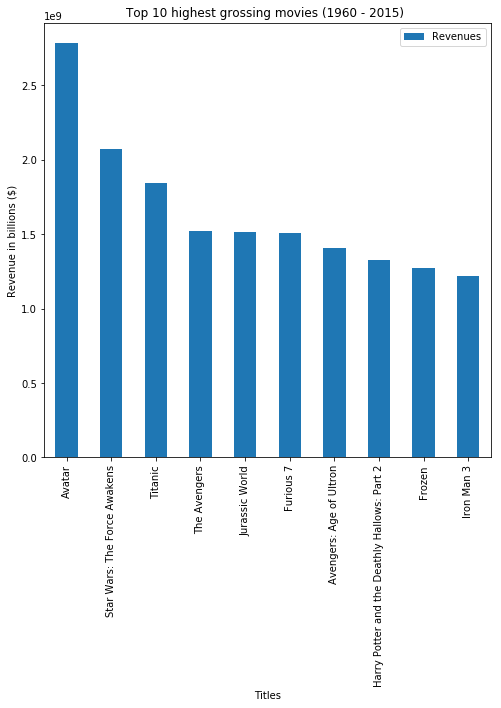

In [38]:
# Finding the top 10 highest revenues
sorted_revenue = df['revenue'].sort_values(ascending=False)[:10]
# Finding the top 10 highest revenues by movie title
highest_grossers=pd.DataFrame()
titles=[]
revenues=[]
for i in sorted_revenue.index:
    titles.append(df.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])
highest_grossers['Titles']=titles
highest_grossers['Revenues']=revenues
highest_grossers.set_index('Titles',inplace=True)
# Plotting the top 10 highest grossing movies 
highest_grossers.plot(kind ='bar',figsize=(8,8))
plt.title('Top 10 highest grossing movies (1960 - 2015) ');
plt.ylabel('Revenue in billions ($)');


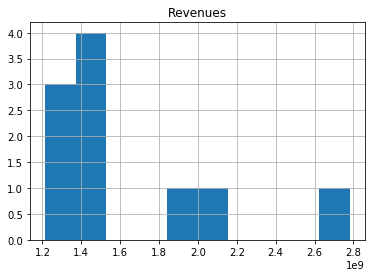

In [39]:
# Plotting a histogram of the Revenues column
highest_grossers.hist(column='Revenues');

According to the above chart, Avatar seems be the #1 highest grossing movie, followed by Star Wars, with Iron Man 3 being in the last place.

### Research Question 2  (What months of release associate with better revenues?)

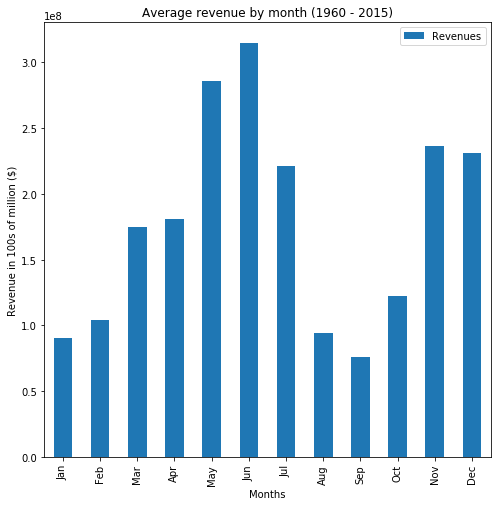

In [40]:
# Extracting the month of release for every movie in a new column
df['release_month']=df['release_date'].dt.month
# Finding the average revenue by month
revenue_by_month = df.groupby('release_month')['revenue'].mean()
df2=pd.DataFrame()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df2['Months']=months
df2['Revenues'] = list(revenue_by_month.get_values())
# Plotting the graph showing average revenue by month
df2.plot(x='Months',y='Revenues',kind='bar',figsize=(8,8));
plt.title('Average revenue by month (1960 - 2015)');
plt.ylabel('Revenue in 100s of million ($)');


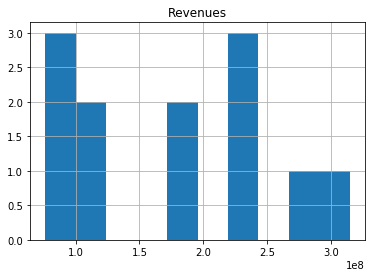

In [41]:
#plotting a histogram of Revenues column

df2.hist(column='Revenues');

According to the above chart, the first two months associated with the highest revenues are May and June. The other two months associated with the second highest revenues are November and December.

### Research Question 3  (What's the relationship between ratings and profits?)

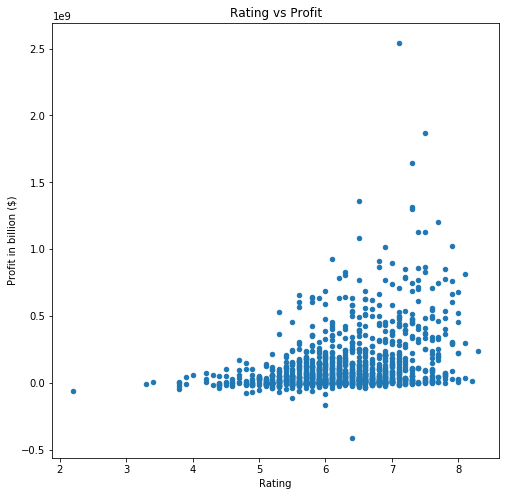

In [42]:
# Finding profits 
df['Profit']=df['revenue']-df['budget']
# Plotting a graph of the relationship between ratings and profits.
df.plot(x='vote_average',y='Profit',kind='scatter',figsize=(8,8));
plt.ylabel('Profit in billion ($)');
plt.xlabel('Rating');
plt.title('Rating vs Profit');

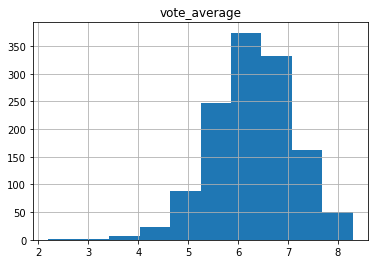

In [43]:
#Plotting a histogram of the vote average column
df.hist(column='vote_average');

In [44]:
# Finding a correlation between ratings and profits
df['vote_average'].corr(df['Profit'])

0.325681811712762

According to the above graph, there seems be no or a weak positive relationship between ratings and profits because the value of the correlation coefficient is so close to zero (0.27).

<a id='conclusions'></a>
## Conclusions

* 'Avatar', 'Star Wars' and 'Titanic' are the top three most profitable movies.
* May, June, November and December are the months associated with the highest revenues.
* There is no or a weak postive relationship between profits and ratings as the r value is so close to the zero.

# Limitations
* Rows with missing values and zero values were dropped, hence a lot of key data have been lost in the process.
* The budget and revenue columns did not have a currency specified so there may be some differences due to fluctuating exchange rates.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0